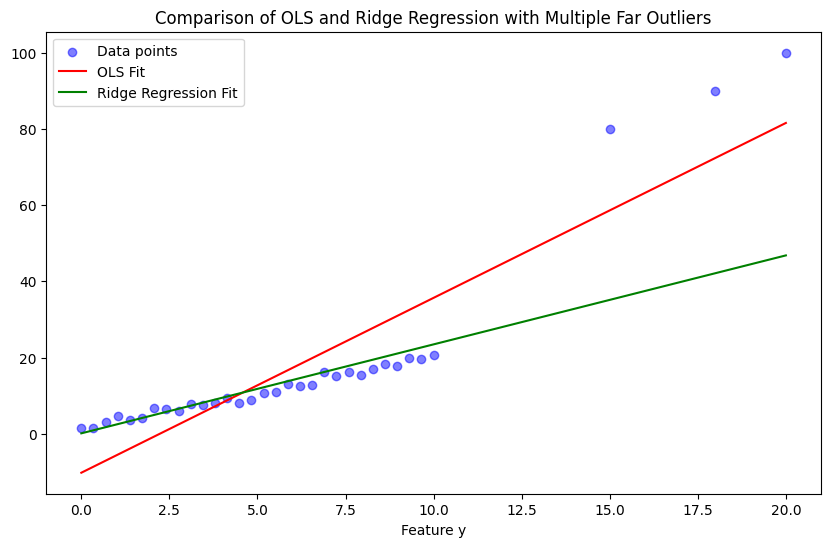

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

#Set a random seed for reproducibility
np.random.seed(42)

#Generate a simple linear dataset
n_samples = 30
X_input = np.linspace(0,10,n_samples)
y = 2 * X_input + 1 + np.random.randn(n_samples)

#Add three impactfull outliers
X_input = np.append(X_input,[15,18,20])
y = np.append(y,[80,90,100])

#Add the intercept term
X = np.hstack([np.ones((n_samples + 3,1)),  X_input.reshape(-1,1)])

#Compute the OLS and Ridge regression solution
beta_OLS = np.linalg.inv(X.T @ X) @ X.T @ y
lambda_ridge = 1000   # A stronger lambda to emphasize Ridge;s dampening effect
I = np.eye(X.shape[1])
beta_Ridge = np.linalg.inv(X.T @ X + lambda_ridge * I) @ X.T @ y

#Prepare to plot
plt.figure(figsize=[10,6])
plt.scatter(X_input, y, color='blue', alpha=0.5, label='Data points')

#Plot the OLS fit
x_range = np.linspace(np.min(X_input), np.max(X_input),100)
y_OLS = beta_OLS[0] + beta_OLS[1] * x_range
plt.plot(x_range,y_OLS,'r-',label='OLS Fit')

#Plot the Ridge regression fit
y_Ridge = beta_Ridge[0] + beta_Ridge[1] *x_range
plt.plot(x_range, y_Ridge,'g-',label='Ridge Regression Fit')

plt.xlabel("Feature X")
plt.xlabel("Feature y")
plt.title("Comparison of OLS and Ridge Regression with Multiple Far Outliers")
plt.legend()
plt.show()
